# Data Fitting and MCMC Homework Solutions

March 8 2024

ASTR5900 - Computational Astrophysics

Stephanie, Chanuntorn, Cosme, Gil

_____

In [26]:
#we import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Question 1

## 1a
Sample 10 points from the following equation in the range of [0,9]:

$$y = 3x - 5$$

Write your own least squares linear fitting function and apply it to your generated data. Does the least squares method recover the equation? 

______

We code up our equation first and evenly sample it in the range required:

In [2]:
#the function
def func1a(x):
    return (3*x) - 5

In [3]:
#generating our x values:
xlst_1a = np.linspace(0,9,10)
#generating our y values:
ylst_1a = func1a(xlst_1a)

For a set of data that is fit by a function, $f(x) = a + bx$, we can determine parameters $a$ and $b$ by calculating the following:

$$ a = \frac{\sum y_i \sum x_i^2 - \sum x_i \sum x_i y_i}
{N \sum x_i^2 - (\sum x_i)^2} $$

$$b = \frac{N\sum x_i y_i - \sum x_i \sum y_i}{N \sum x_i^2 - (\sum x_i)^2}
$$

We code this below.

In [4]:
#fit linear data with a line of best fit. We calculate its slope and y-int
def linear_least_square(x,y):
    '''
    Uses the least square numerical method to fit a function of the form
    f(x) = a + b*x to the set of data (x,y)
    
    input:
        - x: list of x values
        - y: list of y values
        
    ouput:
        - A: the y intercept of the calculated line of best fit
        - B: the slope of the calculated line of best fit
    '''
    N=float(len(x))
    #A= y-int, B= slope
    delta=(N*(np.sum(x**2)))-((np.sum(x))**2)
    A_top=((np.sum(y))*(np.sum(x**2)))-((np.sum(x))*(np.sum(x*y)))
    A=(A_top)/(delta)
    B_top=((N*(np.sum(x*y)))-((np.sum(x))*(np.sum(y))))
    B=(B_top)/(delta)
    return A,B

We now apply our linear least square function to our generated data:

In [5]:
yint_1a, slope_1a = linear_least_square(xlst_1a,ylst_1a)

In [17]:
print('Using our linear least square function, we obtain a best fit line of:\n y = {} + {}*x'.format(yint_1a,slope_1a))

Using our linear least square function, we obtain a best fit line of:
 y = -5.0 + 3.0*x


We arrive back to our original function, so our linear least square function works!

Let's plot it for fun:

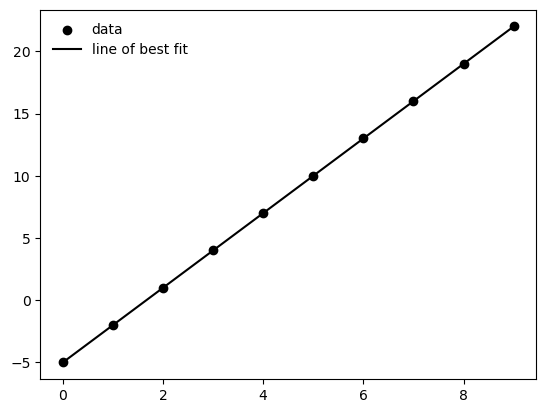

In [13]:
plt.scatter(xlst_1a,ylst_1a,color='k',label='data')
plt.plot(xlst_1a,-5 + 3*xlst_1a,color='k',label='line of best fit')
plt.legend(frameon=False)
plt.show()

______
## 1b

Now take the data provided in testdata.txt. Find the linear equation that best fits the data using your own function.

_____

In [7]:
#we import the data using pandas
#you are free to import using your preferred method
import pandas as pd

In [8]:
#path to data
data_loc = '../data/'
#read in the data
data1 = pd.read_csv(data_loc+'testdata.csv',index_col=None)

In [9]:
#visually inspect first 5 rows of data
data1.head()

,x,y
0,50.000000,885404.000000
1,50.505051,912394.964022
2,51.010101,939929.038983
3,51.515152,968011.635584
4,52.020202,996648.164531


We use our fxn again to fit the data:

In [10]:
yint_1b, slope_1b = linear_least_square(data1['x'],data1['y'])

In [74]:
print('Using our linear least square function, we obtain a best fit line of:\n y = {:.2f} + {:.2f}*x'.format(yint_1b,slope_1b))

Using our linear least square function, we obtain a best fit line of:
 y = -5793967.53 + 121410.67*x


Let's visually inspect our data:

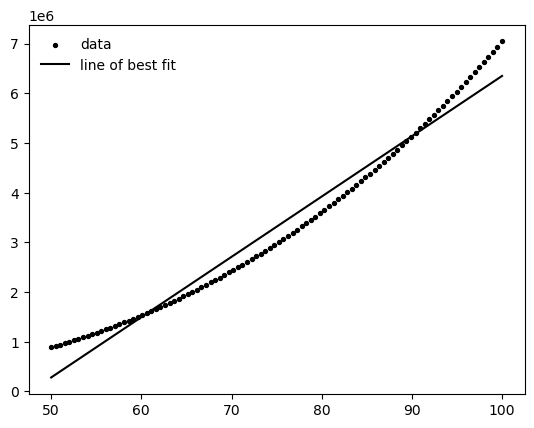

In [21]:
plt.scatter(data1['x'],data1['y'],color='k',label='data',s=8)
plt.plot(data1['x'],yint_1b + slope_1b*data1['x'],color='k',label='line of best fit')
plt.legend(frameon=False)
plt.show()

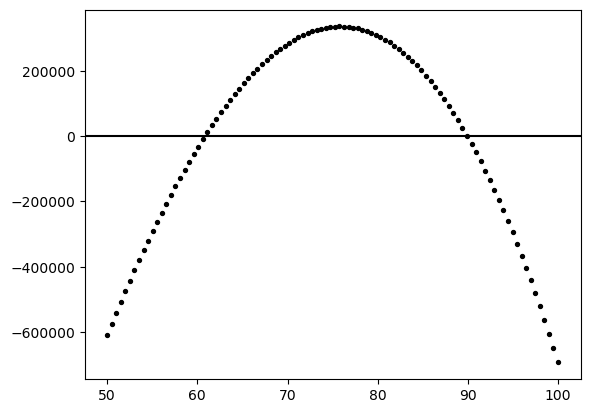

In [47]:
#we plot the residuals of our data as well
line_of_best_fit_1b = yint_1b + slope_1b*data1['x']
residuals = (line_of_best_fit_1b - data1['y'])

plt.scatter(data1['x'],residuals,color='k',s=8)
plt.axhline(0.0,color='k')
plt.show()

Visually, the fit doesn't seem too great. We can check the wellness of fit by looking at the standard deviation of the residuals:

In [25]:
print('the standard deviation of the residuals is: {:.2f}'.format(np.std(residuals)))

the standard deviation of the residuals is: 300611.05


_____
### 1c

Now use the numpy.linalg.lstsq fit function to fit a linear line and a 2nd order polynomial to the provided data. Which is a better fit? Feel free to use any statistical tools (e.g. standard deviation of the residuals, chi-squared calculation, etc.) to determine the accuracy of the fit.

_____

np.linalg.lstsq requires that you create a matrix. The right most column is a column of ones representing the coefficient in front of $x^0$. The column to the left of the ones column contains our x data and represents the coefficient in front of $x^1$.

In [34]:
#we construct our array of ones
v0 = np.ones(len(data1['x']))
#construct our a_1*x^1 data
v1 = data1['x']
#pass our y data to a variable for easier handling
y_data = data1['y']
#we create our matrix using the arrays made above and transpose it.
matrix1c_linear = np.vstack( [v1,v0]).T
#now we pass our matrix and y data to lstsq()
linear_model_params = np.linalg.lstsq(matrix1c_linear, y_data, rcond=None)[0]
#let's read out our data:
slope_linear = linear_model_params[0]
intercept_linear = linear_model_params[1]

print ('The slope is ',slope_linear)
print ('The intercept is ',intercept_linear)

The slope is  121410.67319661255
The intercept is  -5793967.533516985


This is roughly the same equation we derived with our linear least squares function.

We can now use least squares fitting for a quadratic of the form $f(x) = a_0 + a_1x + a_2x^2$.

In [37]:
#we need to create another column in our matrix representing the squared terms:
v2 = v1*v1
#we now create a matrix that has an additional column to the left
matrix1c_quad = np.vstack([v2,v1,v0]).T
quad_model_params = np.linalg.lstsq(matrix1c_quad, y_data, rcond=None)[0]

#we passed a matrix with 3 columns so 3 fit parameters are returned
a0 = quad_model_params[2]       
a1 = quad_model_params[1]
a2 = quad_model_params[0]

print('the fit parameters are f(x)={:.2f} +{:.2f}x + {:.2f}x*x'.format(a0,a1,a2))

the fit parameters are f(x)=2752303.51 +-115439.33x + 1579.00x*x


Let's check the fit visually first:

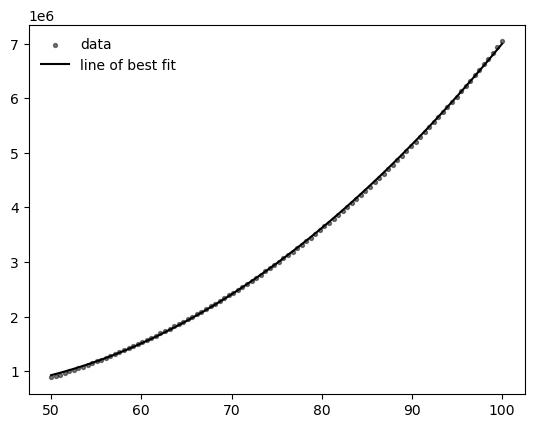

In [41]:
plt.scatter(data1['x'],data1['y'],color='k',label='data',s=8,alpha=0.5)
plt.plot(data1['x'],a0 + a1*data1['x'] + a2*data1['x']**2,color='k',linestyle='-',label='line of best fit')
plt.legend(frameon=False)
plt.show()

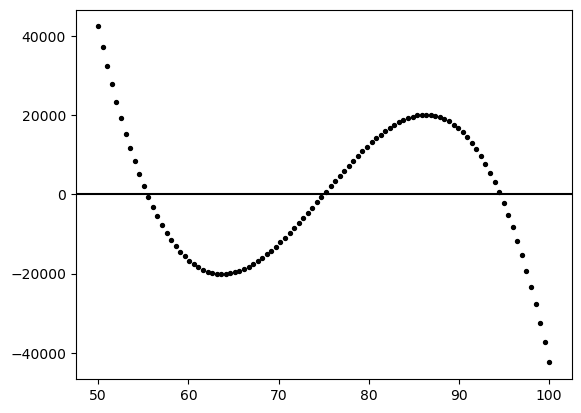

In [46]:
quad_fit_1c = a0 + a1*data1['x'] + a2*data1['x']**2
residuals_quad = (quad_fit_1c - data1['y'])
plt.scatter(data1['x'],residuals_quad,color='k',s=8)
plt.axhline(0.0,color='k')
plt.show()

Visually the fit looks very good. We can verify this statistically:

In [43]:
quad_fit_1c = a0 + a1*data1['x'] + a2*data1['x']**2
residuals_quad = (quad_fit_1c - data1['y'])
print('the standard deviation of the residuals is: {:.2f}'.format(np.std(residuals_quad)))

the standard deviation of the residuals is: 17030.18


The quadratic fit clearly does a better job fitting the data, both visually and statistically.

# Question 2

# Question 3

Classical cepheid stars are population I variable stars that have a pulsation period that is related to their luminosity. This relation was first discovered by Henrietta Swan Leavitt in 1908 after her study of variable stars in the Magellanic Clouds. The relation is now called the Leavitt Law.

## 3a

To construct the Leavitt Law, we must first obtain pulsation periods. In the data file called delta_cephei_s_24.csv, you will find TESS data for Delta Cephei, a famous cepheid variable. Using MCMC, find the period of the pulsations of Delta Cephei by fitting the data to a sine wave.

## 3b
In practice, we would need to fit multiple stars. We have done this for you. In the cepheids.txt file, you will find a list of cepheids with their associated absolute magnitude (M_v) and period of variability (P). Using your least squares regression function or np.linalg.lstsq, derive the Leavitt Law, which is in the form of:
$$M_v = \alpha + \beta[\log(P) -1]$$

where $\alpha$ is the y intercept and $\beta$ is the slope.

In [51]:
#let's first read in the data using pandas:
cepheids = pd.read_csv(data_loc+'cepheids.txt',sep='\t',index_col = None)

In [54]:
#inspect the first 5 rows of data:
cepheids.head()

,M_v,P
0,-5.352,35.5513
1,-3.958,10.1507
2,-4.034,9.8424
3,-3.973,7.5949
4,-3.668,7.0128


let's add a column for the calculation of $\log(P)-1$:

In [61]:
cepheids['log_Pminus1'] = np.log10(cepheids['P'])-1

In [62]:
#we inspect our dataframe again:
cepheids.head()

,M_v,P,log_Pminus1
0,-5.352,35.5513,0.550855
1,-3.958,10.1507,0.006496
2,-4.034,9.8424,-0.006899
3,-3.973,7.5949,-0.119478
4,-3.668,7.0128,-0.154109


We now use our linear least squares function to find the line of best fit:

In [73]:
yint_3b, slope_3b = linear_least_square(cepheids['log_Pminus1'],cepheids['M_v'])
print('The line of best fit is:\n y = {:.2f} + {:.2f}*x'.format(yint_3b,slope_3b))


The line of best fit is:
 y = -4.04 + -2.43*x


We see that our result matches with period-luminosity relations found in the [literature](https://ui.adsabs.harvard.edu/abs/2001ApJ...553...47F/abstract).

Let's now plot the PLR:

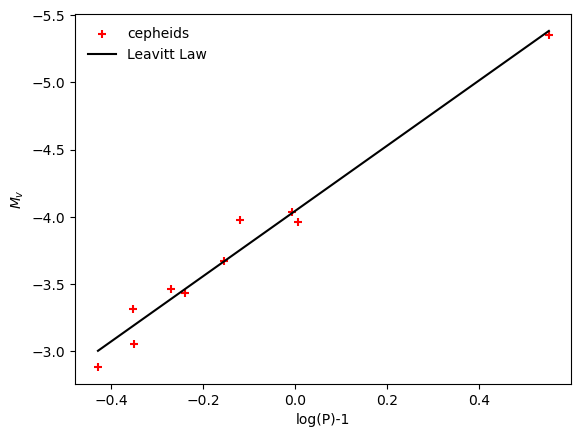

In [71]:
plt.scatter(cepheids['log_Pminus1'],cepheids['M_v'],color='red',marker='+',label='cepheids')
plt.plot(cepheids['log_Pminus1'],yint_3b + slope_3b*cepheids['log_Pminus1'],color='k',label='Leavitt Law')
plt.legend(frameon=False)
plt.ylabel(r'$M_v$')
plt.xlabel('log(P)-1')
plt.gca().invert_yaxis()
plt.show()